#

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.0f}'.format)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [4]:
#loading the dataset
idmb_dataset = pd.read_csv('idmb_cleaned.csv')

idmb = idmb_dataset.copy()
idmb.head()

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Income,Votes,Score
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,28815245,2278845,9
1,tt0068646,The Godfather,1972-09-21,"Crime, Drama",175,USA,R,Francis Ford Coppola,246120974,1572674,9
2,tt0468569,The Dark Knight,2008-07-23,"Action, Crime, Drama",152,USA,PG-13,Christopher Nolan,1005455211,2241615,9
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,408035783,1098714,9
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",NaN,USA,R,Quentin Tarantino,222831817,1780147,9


In [5]:
#all data type goes back to string unless changed in notebook
idmb.dtypes

,0
IMBD title ID,object
Original titlÊ,object
Release year,object
Genrë¨,object
Duration,float64
Country,object
Content Rating,object
Director,object
Income,float64
Votes,int64


In [6]:
#calculating the company with the highest Income per movie
summary_income = idmb.groupby('Country').agg(
    Movie_Count=('Income', 'count'),
    Total_Income=('Income', 'sum'),
    Average_Income=('Income', 'mean'),
    Total_Vote = ('Votes', 'sum'),
    Average_Score = ('Score', 'mean')
).reset_index()

summary_income = summary_income.sort_values(by = 'Total_Income', ascending = False).head(10)

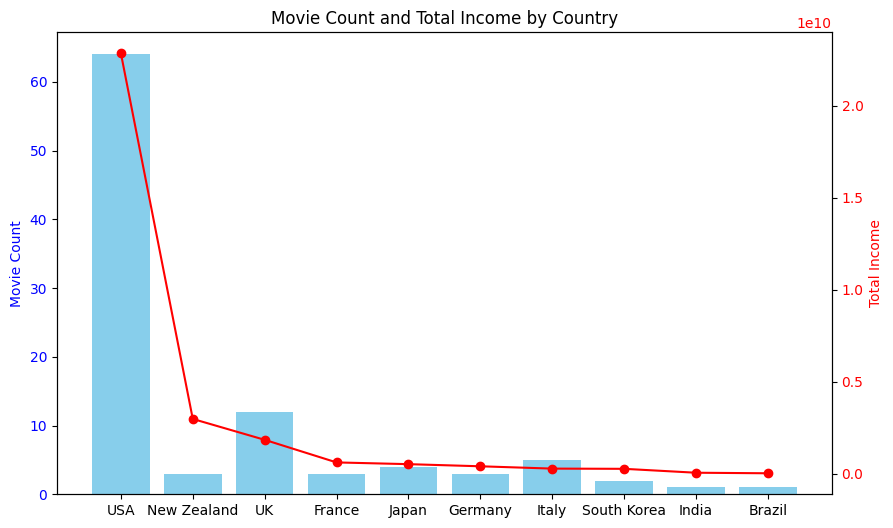

In [7]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Bar plot for Movie_Count
ax1.bar(summary_income['Country'], summary_income['Movie_Count'], color='skyblue')
ax1.set_ylabel('Movie Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis
ax2 = ax1.twinx()
ax2.plot(summary_income['Country'], summary_income['Total_Income'], color='red', marker='o')
ax2.set_ylabel('Total Income', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Movie Count and Total Income by Country')
plt.show()

Therefore New Zealand mad the highest income per movie, while USA had the overall highest income with New Zealand behind

In [8]:
#calculating which content rating made the highest income
summary_rating = idmb.groupby('Content Rating').agg(
    Movie_Count=('Income', 'count'),
    Total_Income=('Income', 'sum'),
    Average_Income=('Income', 'mean')
).reset_index()

summary_rating.sort_values(by = 'Average_Income', ascending = False)

,Content Rating,Movie_Count,Total_Income,Average_Income
3,PG-13,12,7615278645,634606554
1,G,6,3030506041,505084340
5,Unrated,25,8634558718,345382349
2,PG,11,3156416707,286946973
4,R,45,7450536519,165567478
0,Approved,1,25252481,25252481


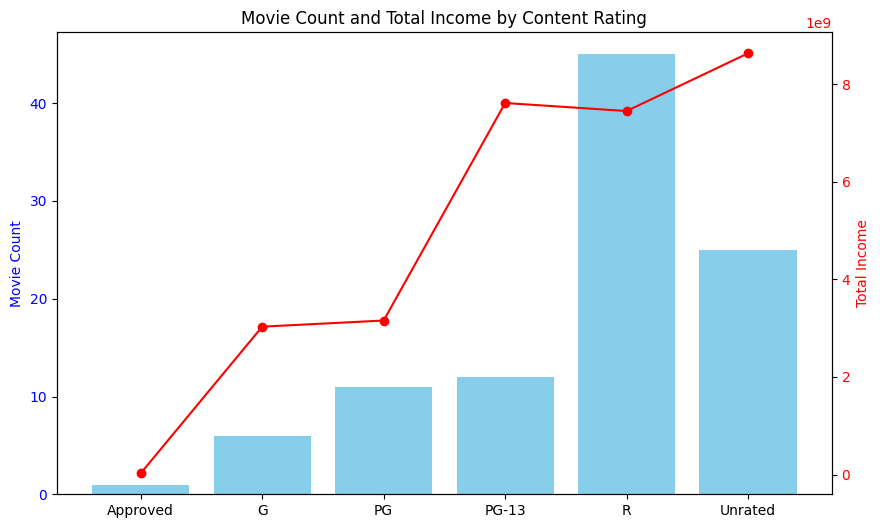

In [9]:
fig, ax1 = plt.subplots(figsize=(10,6))
# Bar plot for Movie_Count
ax1.bar(summary_rating['Content Rating'], summary_rating['Movie_Count'], color='skyblue')
ax1.set_ylabel('Movie Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis
ax2 = ax1.twinx()
ax2.plot(summary_rating['Content Rating'], summary_rating['Total_Income'], color='red', marker='o')
ax2.set_ylabel('Total Income', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Movie Count and Total Income by Content Rating')
plt.show()


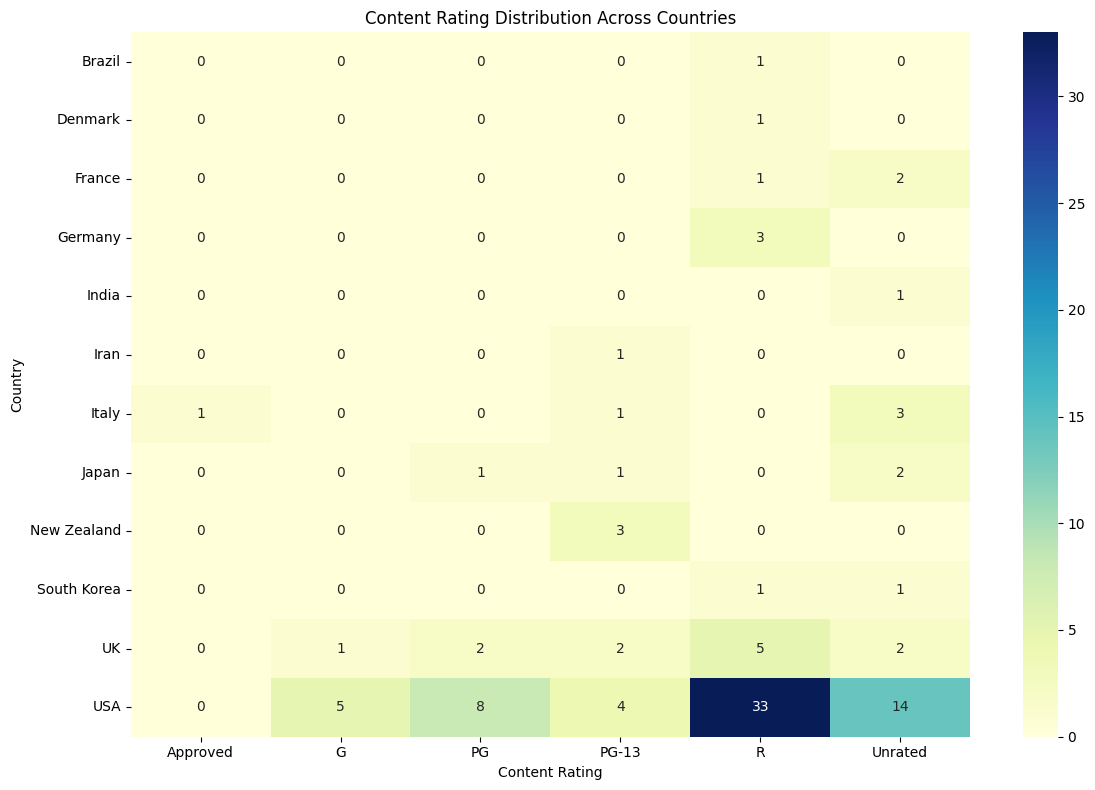

In [10]:
#content rating distribution across each country
idmb_country_rating = idmb.groupby('Country')['Content Rating'].value_counts().unstack(fill_value=0)

#visualization using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(idmb_country_rating, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Content Rating Distribution Across Countries')
plt.xlabel('Content Rating')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [11]:
#convert 'Release year' to datetime format
idmb['Release year'] = pd.to_datetime(idmb['Release year'])

# Extract the month name
idmb['Month'] = idmb['Release year'].dt.strftime('%B')

In [12]:
#calculating the year with the highest income
summary_month = idmb.groupby('Month').agg(
    Movie_Count=('Income', 'count'),
    Total_Income=('Income', 'sum'),
    Average_Income=('Income', 'mean')
).reset_index()
sorted_month = summary_month.sort_values(by='Average_Income', ascending=False).head(13)
sorted_month

,Month,Movie_Count,Total_Income,Average_Income
5,July,2,2072424914,1036212457
0,April,7,5345012865,763573266
4,January,7,3219578910,459939844
1,August,4,1133772383,283443096
3,February,6,1700589086,283431514
10,October,22,6072508900,276023132
11,September,10,2349872031,234987203
8,May,5,1146548302,229309660
9,November,10,2098633106,209863311
2,December,15,2899331371,193288758


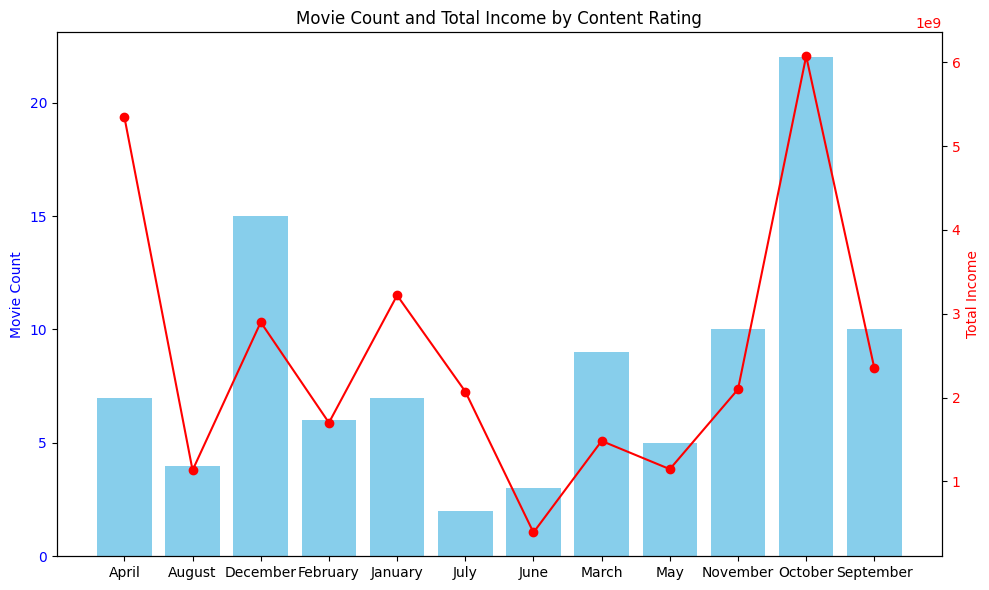

In [13]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar plot for Movie_Count
ax1.bar(summary_month['Month'], summary_month['Movie_Count'], color='skyblue')
ax1.set_ylabel('Movie Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis
ax2 = ax1.twinx()
ax2.plot(summary_month['Month'], summary_month['Total_Income'], color='red', marker='o')
ax2.set_ylabel('Total Income', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.title('Movie Count and Total Income by Content Rating')
plt.tight_layout()  # Optional: prevents label cutoff
plt.show()


In [14]:
#grouping duration

#81 - 130(low), 131 - 200 (medium) & > 200 (high)
idmb['Range_Duration']= np.where(idmb['Duration'] > 200, '>200',
         np.where(idmb['Duration'] <= 130, '81 - 130', '131 - 200'))

idmb.head()

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Income,Votes,Score,Month,Range_Duration
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,28815245,2278845,9,February,131 - 200
1,tt0068646,The Godfather,1972-09-21,"Crime, Drama",175,USA,R,Francis Ford Coppola,246120974,1572674,9,September,131 - 200
2,tt0468569,The Dark Knight,2008-07-23,"Action, Crime, Drama",152,USA,PG-13,Christopher Nolan,1005455211,2241615,9,July,131 - 200
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,408035783,1098714,9,September,>200
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",NaN,USA,R,Quentin Tarantino,222831817,1780147,9,October,131 - 200


In [15]:
#calculating the duration with the highest income
summary_duration = idmb.groupby('Range_Duration').agg(
    Movie_Count=('Income', 'count'),
    Total_Income=('Income', 'sum'),
    Average_Income=('Income', 'mean')
).reset_index()

summary_duration = summary_duration.sort_values(by = 'Total_Income', ascending = False).head(10)
summary_duration

,Range_Duration,Movie_Count,Total_Income,Average_Income
0,131 - 200,44,17724526720,402830153
1,81 - 130,50,10484990145,209699803
2,>200,6,1703032246,283838708


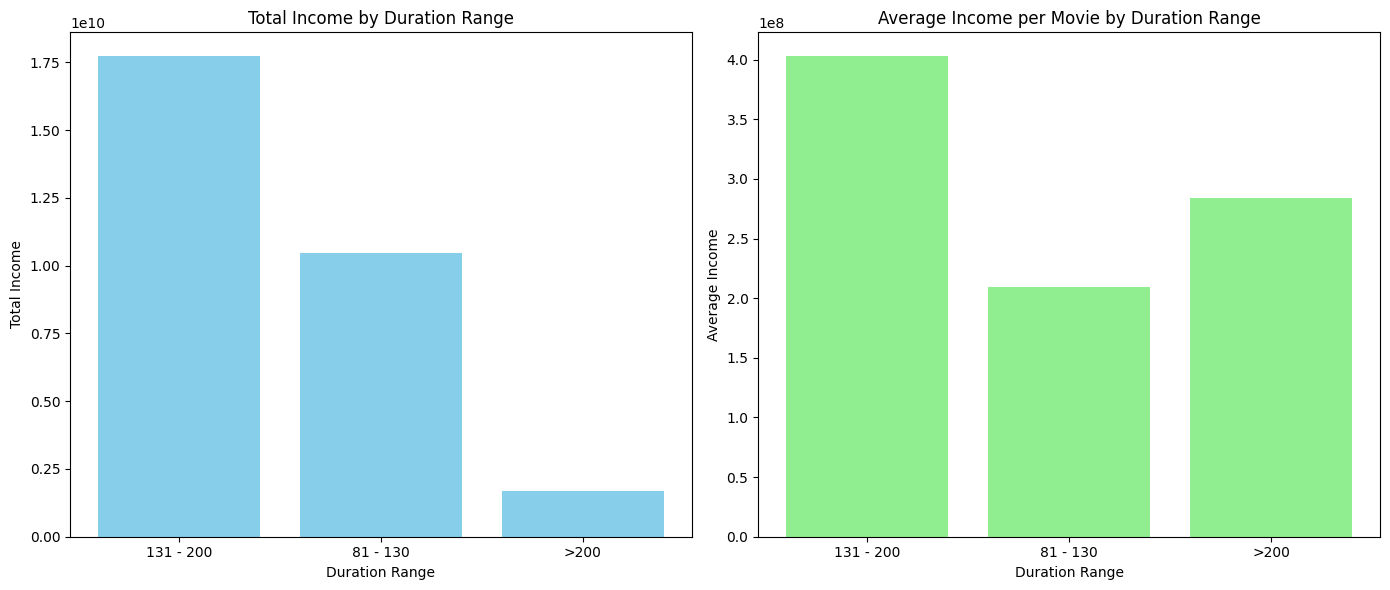

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Total income
axes[0].bar(summary_duration['Range_Duration'], summary_duration['Total_Income'], color='skyblue')
axes[0].set_title('Total Income by Duration Range')
axes[0].set_xlabel('Duration Range')
axes[0].set_ylabel('Total Income')

# Average income
axes[1].bar(summary_duration['Range_Duration'], summary_duration['Average_Income'], color='lightgreen')
axes[1].set_title('Average Income per Movie by Duration Range')
axes[1].set_xlabel('Duration Range')
axes[1].set_ylabel('Average Income')

plt.tight_layout()
plt.show()

In [20]:
#print top 10 movies with the country
idmb.head(10)

,IMBD title ID,Original titlÊ,Release year,Genrë¨,Duration,Country,Content Rating,Director,Income,Votes,Score,Month,Range_Duration,High_Income
0,tt0111161,The Shawshank Redemption,1995-02-10,Drama,142,USA,R,Frank Darabont,28815245,2278845,9,February,131 - 200,no
1,tt0068646,The Godfather,1972-09-21,"Crime, Drama",175,USA,R,Francis Ford Coppola,246120974,1572674,9,September,131 - 200,no
2,tt0468569,The Dark Knight,2008-07-23,"Action, Crime, Drama",152,USA,PG-13,Christopher Nolan,1005455211,2241615,9,July,131 - 200,yes
3,tt0071562,The Godfather: Part II,1975-09-25,"Crime, Drama",220,USA,R,Francis Ford Coppola,408035783,1098714,9,September,>200,yes
4,tt0110912,Pulp Fiction,1994-10-28,"Crime, Drama",NaN,USA,R,Quentin Tarantino,222831817,1780147,9,October,131 - 200,no
5,tt0167260,The Lord of the Rings: The Return of the King,2004-02-22,"Action, Adventure, Drama",201,New Zealand,PG-13,Peter Jackson,1142271098,1604280,9,February,>200,yes
6,tt0108052,Schindler's List,1994-03-11,"Biography, Drama, History",NaN,USA,R,Steven Spielberg,322287794,1183248,9,March,131 - 200,no
7,tt0050083,12 Angry Men,1957-09-04,"Crime, Drama",96,USA,Unrated,Sidney Lumet,576,668473,9,September,81 - 130,no
8,tt1375666,Inception,2010-09-24,"Action, Adventure, Sci-Fi",148,USA,PG-13,Christopher Nolan,869784991,2002816,9,September,131 - 200,yes
9,tt0137523,Fight Club,1999-10-29,Drama,inf,UK,R,David Fincher,101218804,1807440,9,October,>200,no


**WORKING ON GENRE**

In [18]:
#setting the threshold for high income and score
income_threshold = idmb['Income'].quantile(0.75)
score_threshold = idmb['Score'].quantile(0.75)

#adding back to the idmb dataset
idmb['High_Income'] = np.where(idmb['Income'] >= income_threshold, 'yes', 'no')
#idmb['High_Score'] = np.where(idmb['Score'] >= score_threshold, 'yes', 'no')

USING DECISION TREE

In [33]:
#seeting features(X) and targets(Y)
x = idmb[['Genrë¨', 'Content Rating', 'Month', 'Duration', 'Score']]
y = idmb['High_Income']

x.head()

,Genrë¨,Content Rating,Month,Duration,Score
0,Drama,R,February,142,9
1,"Crime, Drama",R,September,175,9
2,"Action, Crime, Drama",PG-13,July,152,9
3,"Crime, Drama",R,September,220,9
4,"Crime, Drama",R,October,NaN,9


In [36]:
#define categorical and numeric features
categorical_features = ['Genrë¨', 'Content Rating', 'Month']
numeric_features = ['Duration', 'Score']

#build preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ])

In [48]:
from sklearn.impute import SimpleImputer

# Replace infinite values with NaN
x['Duration'] = x['Duration'].replace([np.inf, -np.inf], np.nan)

#build preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', Pipeline(steps=[('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                               ('scaler', StandardScaler())]), numeric_features)
    ])

#build pipeline with preprocessing + decision tree
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(random_state=42))])

#repeated cross validation setup
cv = RepeatedStratifiedKFold(n_splits = 5,
                             n_repeats = 10, random_state = 42)

#evaluate with cross validation
scores = cross_val_score(clf, x, y, scoring = 'accuracy', cv = cv, error_score = 'raise')

#print results
print('Mean Accuracy:', np.mean(scores))
print('std dev accuracy:', np.std(scores))

/tmp/ipython-input-857672915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Duration'] = x['Duration'].replace([np.inf, -np.inf], np.nan)


Mean Accuracy: 0.7510000000000001
std dev accuracy: 0.06284106937345992
